<a href="https://colab.research.google.com/github/NataliaOsiecka/IR12BBAA/blob/master/IR_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd '/content/drive/My Drive/IR_ML'

/content/drive/My Drive/IR_ML


In [2]:
ls

12BBAAT100P0.CSV  12BBAAT108P0.CSV  12BBAAT116P0.CSV  12BBAAT93P0.CSV
12BBAAT101P0.CSV  12BBAAT109P0.CSV  12BBAAT117P0.CSV  12BBAAT94P0.CSV
12BBAAT102P0.CSV  12BBAAT110P0.CSV  12BBAAT118P0.CSV  12BBAAT95P0.CSV
12BBAAT103P0.CSV  12BBAAT111P0.CSV  12BBAAT119P0.CSV  12BBAAT96P0.CSV
12BBAAT104P0.CSV  12BBAAT112P0.CSV  12BBAAT120P0.CSV  12BBAAT97P0.CSV
12BBAAT105P0.CSV  12BBAAT113P0.CSV  12BBAAT90P0.CSV   12BBAAT98P0.CSV
12BBAAT106P0.CSV  12BBAAT114P0.CSV  12BBAAT91P0.CSV   12BBAAT99P0.CSV
12BBAAT107P0.CSV  12BBAAT115P0.CSV  12BBAAT92P0.CSV


In [3]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
filenames=(glob.glob('12BBAAT*.CSV', recursive=True))
print(filenames)

df=np.zeros((1869,32))
temperature=[]

for i, item in enumerate(filenames):
    t=item[7:]
    temp=t[:-6]
    temperature.append(temp)
    data=np.loadtxt(item, delimiter=',')
    if data.shape[0]<1869:
        for j,it in enumerate(data[:,1]):
            df[j,i+1]=it
    else:
        df[:,i+1]=data[:,1]
        df[:,0]=data[:,0]

df_new=df[125:1505,:]


['12BBAAT120P0.CSV', '12BBAAT119P0.CSV', '12BBAAT118P0.CSV', '12BBAAT117P0.CSV', '12BBAAT116P0.CSV', '12BBAAT115P0.CSV', '12BBAAT114P0.CSV', '12BBAAT113P0.CSV', '12BBAAT112P0.CSV', '12BBAAT111P0.CSV', '12BBAAT110P0.CSV', '12BBAAT109P0.CSV', '12BBAAT108P0.CSV', '12BBAAT107P0.CSV', '12BBAAT106P0.CSV', '12BBAAT105P0.CSV', '12BBAAT104P0.CSV', '12BBAAT103P0.CSV', '12BBAAT102P0.CSV', '12BBAAT101P0.CSV', '12BBAAT100P0.CSV', '12BBAAT99P0.CSV', '12BBAAT98P0.CSV', '12BBAAT97P0.CSV', '12BBAAT96P0.CSV', '12BBAAT95P0.CSV', '12BBAAT94P0.CSV', '12BBAAT93P0.CSV', '12BBAAT92P0.CSV', '12BBAAT91P0.CSV', '12BBAAT90P0.CSV']


In [5]:
df_new

array([[6.402611e+02, 9.662942e-01, 9.729304e-01, ..., 1.106626e+00,
        1.106479e+00, 1.108438e+00],
       [6.421896e+02, 9.508676e-01, 9.572494e-01, ..., 1.078393e+00,
        1.077716e+00, 1.079163e+00],
       [6.441181e+02, 9.379502e-01, 9.434038e-01, ..., 1.053181e+00,
        1.052320e+00, 1.053952e+00],
       ...,
       [3.295802e+03, 8.219740e-01, 7.640269e-01, ..., 8.723261e-01,
        8.684932e-01, 8.772359e-01],
       [3.297730e+03, 8.220798e-01, 7.651330e-01, ..., 8.741111e-01,
        8.697462e-01, 8.787884e-01],
       [3.299658e+03, 8.231922e-01, 7.659836e-01, ..., 8.753667e-01,
        8.698291e-01, 8.792416e-01]])

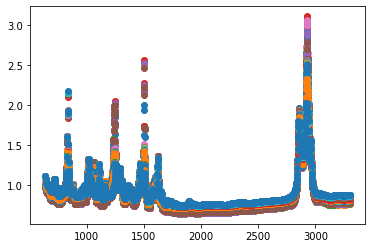

In [6]:
for i in range(1,df.shape[1]):    
    plt.scatter(df_new[:,0], df_new[:,i])
plt.show()

In [0]:
pd_df=pd.DataFrame(data=df_new[:,1:], 
                   index=df_new[:,0],
                   columns=temperature)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


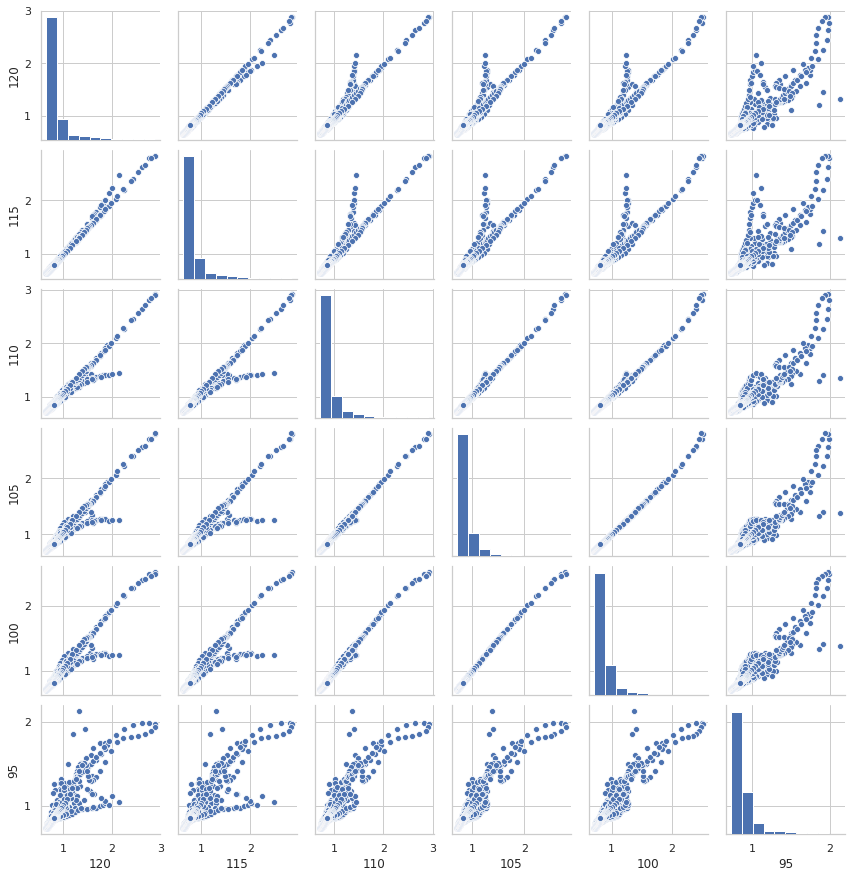

In [8]:
#EDA explolatory data analysis str 278
sns.set(style='whitegrid', context='notebook')
cols=['120','115','110','105','100','95']
sns.pairplot(pd_df[cols], size=2)
cols=['120','117','115','114','110','107','105','102','100','98','95','92','90']
cm=np.corrcoef(pd_df[cols].values.T)
sns.set(font_scale=1.5)
#hm=sns.heatmap(cm, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15}, yticklabels=cols,xticklabels=cols)
plt.show()

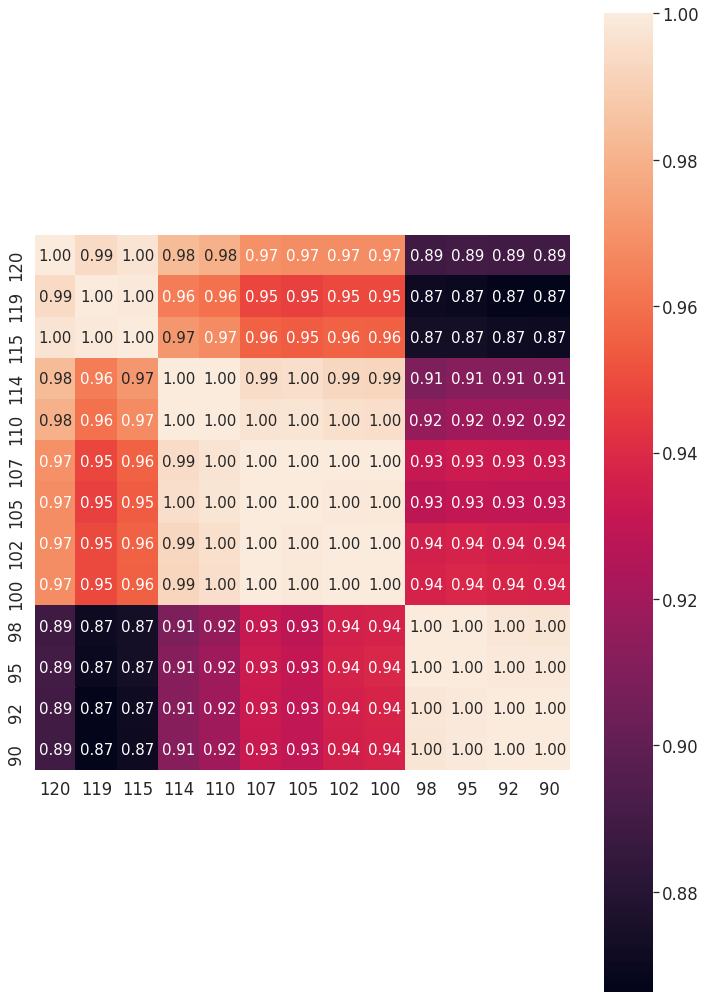

In [9]:
#EDA explolatory data analysis 
plt.figure(figsize=(12, 18))
cols=['120','119','115','114','110','107','105','102','100','98','95','92','90']
cm=np.corrcoef(pd_df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15}, yticklabels=cols,xticklabels=cols)
plt.show()

In [0]:
df_transposed = pd_df.T

In [11]:
df_transposed.shape
df_transposed.index.values

array(['120', '119', '118', '117', '116', '115', '114', '113', '112',
       '111', '110', '109', '108', '107', '106', '105', '104', '103',
       '102', '101', '100', '99', '98', '97', '96', '95', '94', '93',
       '92', '91', '90'], dtype=object)

In [0]:
km1 = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=0.0001, random_state=0)

In [0]:
y_km1=km1.fit_predict(df_transposed)

In [14]:
y_km1
km1.inertia_

5.067530663342153

In [15]:
km2 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=0.0001, random_state=0)
y_km2=km2.fit_predict(df_transposed)
y_km2
km2.inertia_

10.555343524759929

In [16]:
km3 = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=0.0001, random_state=0)
y_km3=km3.fit_predict(df_transposed)
y_km3
#km3.inertia_

array([3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [17]:
km4 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.00001, random_state=0)
y_km4=km4.fit_predict(df_transposed)
y_km4
km4.inertia_

5.067530663342153

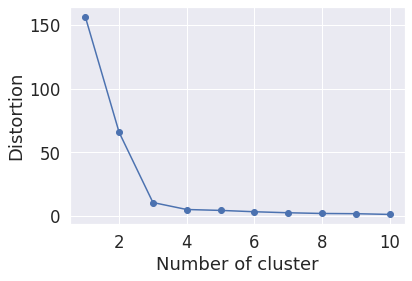

In [18]:
distortions = []
for i in range(1,11):
  km = KMeans(n_clusters = i, init='random', n_init=10, max_iter=300, random_state=0)
  km.fit(df_transposed)
  distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

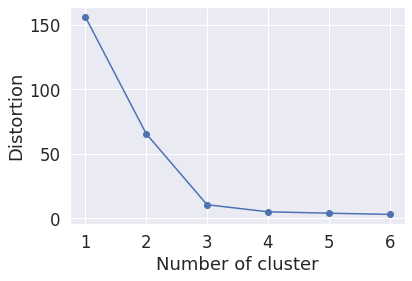

In [19]:
distortions = []
for i in range(1,7):
  km = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  km.fit(df_transposed)
  distortions.append(km.inertia_)

plt.plot(range(1,7), distortions, marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

In [0]:
row_clusters = linkage(df_transposed.values, method='complete', metric='euclidean')

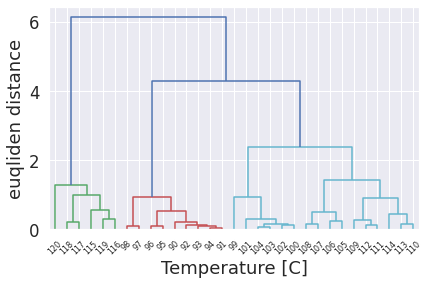

In [21]:
labels = df_transposed.index.values
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('euqliden distance')
plt.xlabel('Temperature [C]')
plt.show()

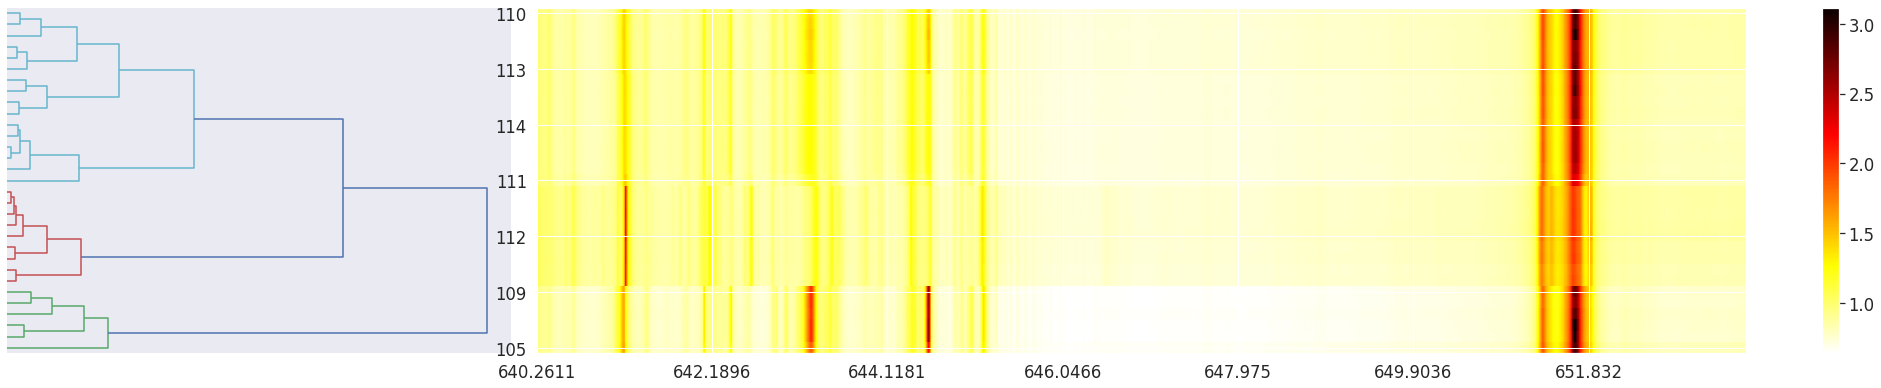

In [22]:
fig = plt.figure(figsize=(35,8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='right')
df_rowclust = df_transposed.iloc[row_dendr['leaves'][::-1]]
axm = fig.add_axes([0.3, 0.1, 0.6, 0.6])
extent = [640, 3300, 110, 120]
cax = axm.imshow(df_rowclust, interpolation='nearest', cmap='hot_r',aspect='auto')
#cax = axm.imshow(df_rowclust)
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
  i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

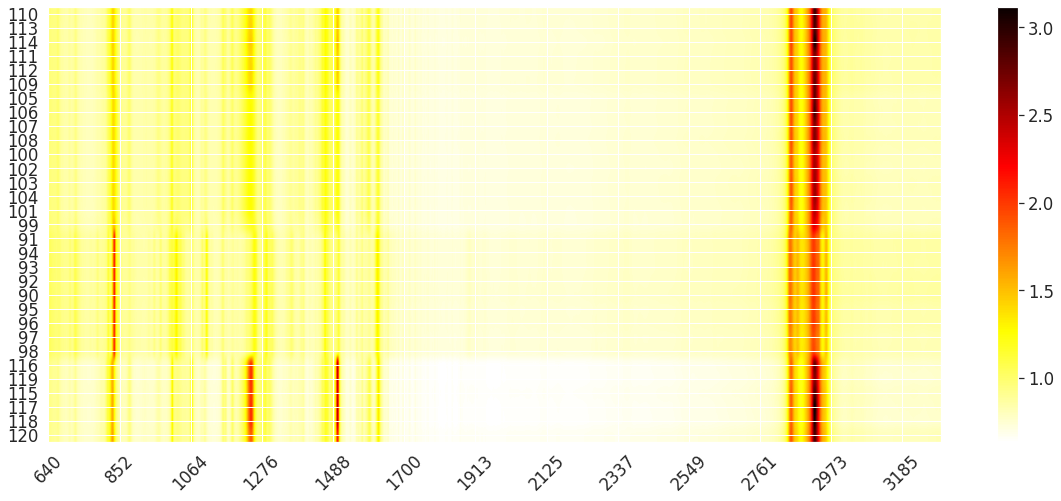

In [23]:
x_label = []
for i in df_rowclust.columns:
  x_label.append(str(int(i)))
plt.figure(figsize=(20,8))
plt.imshow(df_rowclust, aspect='auto', cmap='hot_r')
plt.yticks(np.arange(df_rowclust.index.values.shape[0]), df_rowclust.index.values)
plt.xticks(np.arange(len(x_label)), x_label[::110], rotation=45)
plt.locator_params(axis='x', nbins=len(x_label)/110)
plt.colorbar()
plt.show()

In [24]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=4, metric='euclidean')
#km3 = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=0.0001, random_state=0)
y_db=db.fit_predict(df_transposed)
y_db
#km3.inertia_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
        0,  0,  0,  0, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1])

In [25]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=50, n_init=10, max_no_improvement=10, verbose=0 )
y_mbk = mbk.fit_predict(df_transposed)
y_mbk

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [26]:
from sklearn.cluster import MiniBatchKMeans
mbk1 = MiniBatchKMeans(init='k-means++', n_clusters=4, batch_size=50, n_init=10, max_no_improvement=10, verbose=0 )
y_mbk1 = mbk1.fit_predict(df_transposed)
y_mbk1

array([2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(df_transposed)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_transposed, labels, metric='sqeuclidean'))


Estimated number of clusters: 3
Silhouette Coefficient: 0.928


In [28]:
cluster_centers_indices

array([ 5, 12, 24])